In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv('data\preprocessed.csv').dropna()

In [10]:
X = data["Reviews_cleaned"]
y = data["Category"]

In [11]:
maxlen = 10
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print(f"Znaleziono {len(word_index)} unikatowych tokenów.")
data_X = pad_sequences(sequences, maxlen=maxlen)
print(f"Kształt tensora danych: {data.shape}") 
print(f"Kształt tensora etykiet: {y.shape}")

Znaleziono 9691 unikatowych tokenów.
Kształt tensora danych: (40700, 245)
Kształt tensora etykiet: (40700,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [14]:
X_train.shape, X_test.shape, X.shape

((32560, 10), (8140, 10), (40700,))

In [15]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/15
204/204 [==============================] - 21s 50ms/step - loss: 0.5057 - accuracy: 0.7581 - val_loss: 0.4519 - val_accuracy: 0.7915
Epoch 2/15
204/204 [==============================] - 8s 39ms/step - loss: 0.4327 - accuracy: 0.8092 - val_loss: 0.4546 - val_accuracy: 0.7913
Epoch 3/15
204/204 [==============================] - 8s 41ms/step - loss: 0.4171 - accuracy: 0.8209 - val_loss: 0.4470 - val_accuracy: 0.7944
Epoch 4/15
204/204 [==============================] - 9s 42ms/step - loss: 0.4056 - accuracy: 0.8278 - val_loss: 0.4513 - val_accuracy: 0.7941
Epoch 5/15
204/204 [==============================] - 8s 40ms/step - loss: 0.3975 - accuracy: 0.8330 - val_loss: 0.4609 - val_accuracy: 0.7901
Epoch 6/15
204/204 [==============================] - 8s 39ms/step - loss: 0.3910 - accuracy: 0.8363 - val_loss: 0.4570 - val_accuracy: 0.7936
Epoch 7/15
204/204 [==============================] - 8s 40ms/step - loss: 0.3855 - accuracy: 0.8406 - val_loss: 0.4602 - val_accuracy: 0.794

In [18]:
import matplotlib.pyplot as plt
def plot_history(history, key="loss"):
    metric = history.history[key]
    val_metric = history.history[f"val_{key}"]
    epochs = range(len(metric))
    plt.plot(epochs, metric, "bo", label=f"{key} - train")
    plt.plot(epochs, val_metric, "b", label=f"{key} - val")
    plt.title(f"training - {key}")
    plt.legend()
    plt.show()

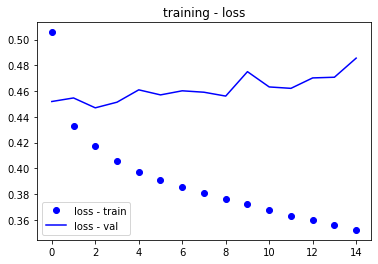

In [19]:
plot_history(history)

In [20]:
y_pred = np.round(model.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64      2509
         1.0       0.83      0.89      0.86      5631

    accuracy                           0.80      8140
   macro avg       0.77      0.74      0.75      8140
weighted avg       0.79      0.80      0.79      8140



In [21]:
cohen_kappa_score(y_test, y_pred)

0.4980335316634462

In [22]:
f1_score(y_test, y_pred)

0.8577054794520548